## Simple Linear Regression :
This dataset is from weather conditions in world war 2
Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [64]:
#Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
#reading data using pandas library
ww2Data = pd.read_csv('Summary of Weather.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
ww2Data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
ww2Data.shape

(119040, 31)

In [68]:
#Getting minimum temperature as independent value
minTemp = ww2Data.iloc[:,5]
X = minTemp.values.reshape(-1,1)      #reshaping to model it in LinearRegression

In [69]:
#Getting maximum temperature as a dependent value
y = ww2Data.MaxTemp

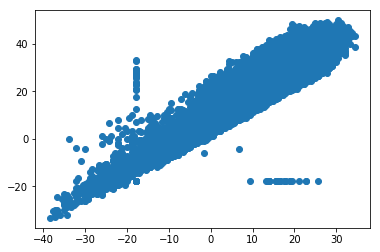

In [74]:
#Plotting the datasets
plt.scatter(X, y)
plt.show()

In [71]:
#splitting dataset by training and testing 
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35)

In [54]:
X_train.shape

(77376, 1)

In [55]:
X_test.shape

(41664, 1)

In [62]:
#By Sklearn Linear Regression, we are going to model it.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score    #to find the accuracy of the model

In [63]:
#Modelling with training dataset
model = LinearRegression().fit(X_train,y_train)

In [78]:
#predicting with test data
y_pred = model.predict(X_test)

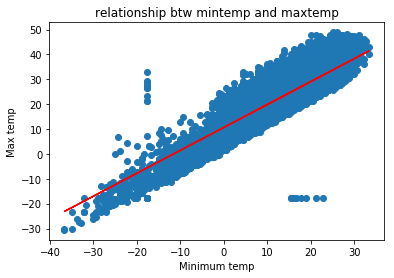

In [98]:
#Plotting the line using matplotlib library
plt.scatter(X_test,y_test)
plt.title('relationship btw mintemp and maxtemp')
plt.xlabel('Minimum temp')
plt.ylabel('Max temp')
plt.plot(X_test , y_pred , color = 'red')
plt.show()

In [137]:
#Accuracy of the model
r2 = r2_score(y_test , y_pred)

In [138]:
print('The accuracy of this model is ' + str(r2*100)+ ' %')

The accuracy of this model is 76.7741822969376 %


In [118]:
print('Coefficent  or slope  m is ',model.coef_[0])

Coefficent  or slope  m is  0.9211003992215289


In [119]:
print('Intercept or b is',model.intercept_)

Intercept or b is 10.640709664125815


Equation is : Max_temp = 0.9211004 * (min_temp) + 10.640709664125815

In [132]:
l = [20,45,86,90]
print('By equation..')
for i in l:
    max_temp = 0.9211004*i + 10.640709664125815
    print('maximum temperature for ' +str(i) +' degree is ',max_temp)

By equation..
maximum temperature for 20 degree is  29.062717664125817
maximum temperature for 45 degree is  52.09022766412582
maximum temperature for 86 degree is  89.85534406412583
maximum temperature for 90 degree is  93.53974566412583


By Equation max_temp for 20 degrees is 93.53974566412583


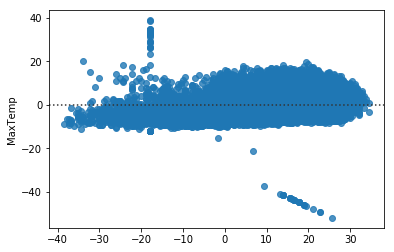

In [128]:
import seaborn 
visualizer = seaborn.residplot(X,y)
visualizer

In [129]:
print('Goal is complted ie., calculated the best possible value for m,b =({},{}) '.format(model.coef_[0],model.intercept_))

Goal is complted ie., calculated the best possible value for m,b =(0.9211003992215289,10.640709664125815) 


In [133]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o